# Agrupamento simples: K-Means
O K-Means é um dos algoritmos de cluster mais populares. Ele identifica K "centróides" que são usados para definir Clusters. Considera-se que um ponto está em um cluster específico se estiver mais próximo do percentil desse cluster do que qualquer outro centróide.



## Clustering Iris Dataset
Vamos utilizar o K-Means para clusterizar os dados do Dataset Iris.

### Carregando o Dataset

In [225]:
from sklearn.datasets import load_iris

iris = load_iris()

In [226]:
# Descrição dos dados
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [227]:
data = iris.data

print("Número de amostras:", data.shape[0])
print("Número de atributos:", data.shape[1])

Número de amostras: 150
Número de atributos: 4


### Função para Visualizar o Dataset

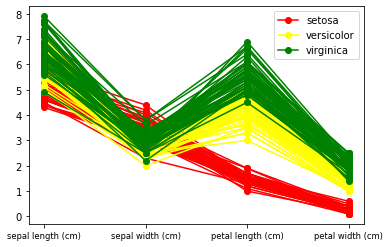

In [228]:
def plot_iris(X, y, x_axis, legend):
    # X é uma matriz numpy que contém as amostras
    # y é uma matriz numpy que contém classes (o número do tipo da íris)
    # x_axis é uma lista que contém os nomes dos atributos (comprimento e largura da sépala, etc.)
    # legend é uma lista que contém nomes de classes (o tipo de íris)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    colors = ['red', 'yellow', 'green']
    for i in range(len(colors)):
        start = True
        for xs in X[y == i]:
            if start:
                ax.plot(xs,'o-', c=colors[i], label=legend[i])
                start = False
            else:
                ax.plot(xs, 'o-', c=colors[i])
    plt.xticks(range(len(x_axis)), x_axis, size='small')
    plt.legend()
    plt.show()

def plot_iris_scatter(X, y, axis, legend, col1, col2):
    # col1 e col2 são números inteiros entre 0 e 3, inclusive, para selecionar dois atributos para visualizar
    colors = ['red', 'yellow', 'green']
    for i in range(len(colors)):
        xs = X[:, col1][y == i]
        ys = X[:, col2][y == i]
        plt.scatter(xs, ys, c = colors[i])
    plt.legend(legend)
    plt.xlabel(axis[col1])
    plt.ylabel(axis[col2])
    plt.show()

plot_iris(iris.data, iris.target, iris.feature_names, iris.target_names)

#### Visualização com atributos 0 e 1 

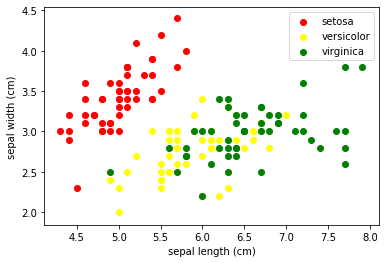

In [229]:
plot_iris_scatter(iris.data, iris.target, iris.feature_names, iris.target_names, 0, 1 )

#### Visualização com atributos 2 e 3 

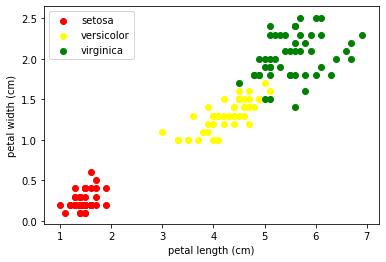

In [230]:
plot_iris_scatter(iris.data, iris.target, iris.feature_names, iris.target_names, 2, 3)

### Processo de Clusterização

#### Separando Dados de Treino dos de Teste

In [231]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.25, random_state=40)

In [232]:
labels = y_train

labels

array([2, 0, 0, 1, 2, 2, 2, 0, 2, 2, 1, 0, 2, 1, 1, 1, 0, 0, 1, 1, 2, 2,
       0, 2, 1, 0, 2, 0, 0, 2, 0, 2, 2, 0, 2, 1, 0, 0, 2, 0, 2, 2, 1, 1,
       2, 1, 2, 0, 2, 1, 1, 0, 0, 0, 2, 2, 1, 0, 1, 2, 2, 1, 2, 2, 1, 1,
       0, 1, 1, 2, 1, 2, 0, 2, 2, 1, 1, 0, 2, 1, 0, 1, 2, 0, 0, 2, 1, 0,
       0, 1, 0, 2, 1, 2, 0, 2, 1, 0, 0, 2, 0, 1, 1, 1, 1, 0, 2, 1, 0, 1,
       0, 1])

In [233]:
unique_labels = np.unique(labels)

print(unique_labels)
print("Quantidade de labels:", len(unique_labels))

[0 1 2]
Quantidade de labels: 3


#### Utilizando o K-Means para Clusterizar os Dados 

In [234]:
from sklearn.cluster import KMeans

X = X_train[:, 2:]
kmeans = KMeans(init='k-means++', n_clusters=3)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

#### Visualização dos Clusters

In [235]:
# Função para visualizar os clusters
def plot_iris_clusters(clf, X, y, axis, legend, loc='lower right'):
    h = .01
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), 
                         np.arange(y_min, y_max, h))
    a = np.c_[xx.ravel(), yy.ravel()]
    z = clf.predict(a)
    z = z.reshape(xx.shape)
    plt.imshow(z, interpolation='nearest', 
               extent=(xx.min(), xx.max(), yy.min(), yy.max()),
               cmap=plt.cm.Paired, aspect='auto', origin='lower')
    colors = ['red', 'yellow', 'green']
    for i in range(len(colors)):
        xs = X[:, 0][y == i]
        ys = X[:, 1][y == i]
        plt.scatter(xs, ys, c = colors[i])
    plt.legend(legend, loc=loc)
    plt.xlabel(axis[0])
    plt.ylabel(axis[1])

    centroids = clf.cluster_centers_
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='.',
                s=169, linewidths=3, color='w', zorder=10)
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xticks(())
    plt.yticks(())
    plt.show()

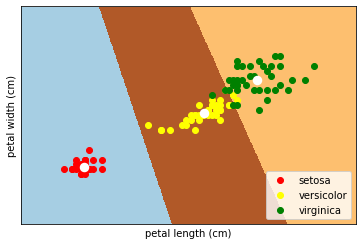

In [236]:
# Utilizando a função plot_iris_clusters com os dados de treino para visualizar os clusters
plot_iris_clusters(kmeans, X, y_train, iris.feature_names[2:], iris.target_names)

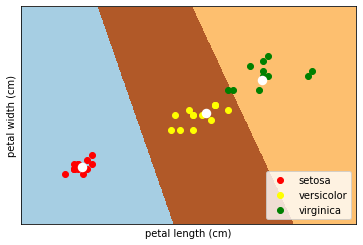

In [237]:
# Utilizando a função plot_iris_clusters com os dados de teste para visualizar os clusters
X_eval = X_test[:,2:]
plot_iris_clusters(kmeans, X_eval, y_test, iris.feature_names[2:], iris.target_names)

## Agrupando dígitos 
Veremos como o K-means funciona usando números de conjuntos de dados no Scikit-Learn.

### Função para Visualizar os Dígitos

In [187]:
import matplotlib.pyplot as plt

def print_digits(images, y, max_n=10):
    plt.figure(1)
    plt.clf()
    fig = plt.figure(figsize=(12, 12))
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05
                        , wspace=0.05)
    i = 0
    while i < max_n and i<images.shape[0]:
        p = fig.add_subplot(20, 20, i+1, xticks=[], yticks=[])
        p.imshow(images[i], cmap=plt.cm.bone)
        p.text(0, 14, str(y[i]))
        i += 1
    plt.show()

### Imports Necessários

In [188]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.preprocessing import scale

### Carregando o Dataset

<Figure size 432x288 with 0 Axes>

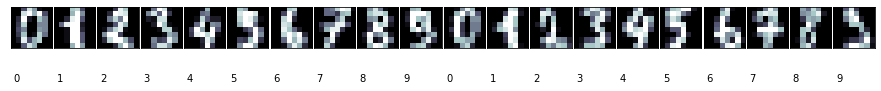

In [189]:
digits = load_digits()

print_digits(digits.images, digits.target, max_n=20)

Podemos ver as figuras (manuscritas) com as classes de destino abaixo. Não vamos usar essas classes porque estamos fazendo um aprendizado não supervisionado (Clustering).

Em seguida, testaremos se poderíamos reagrupar os números com base em suas semelhanças. Normalmente teremos 10 clusters.

### Separando Dados de Treino dos de Teste

In [190]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test, images_train, images_test = \
train_test_split(
    digits.data, digits.target, digits.images, test_size=0.25,
    random_state=41)

print("Número de amostras do dataset: ", digits.data.shape[0])
print("Número de atributos do dataset: ", digits.data.shape[1])

Número de amostras do dataset:  1797
Número de atributos do dataset:  64


In [191]:
n_amostras, n_atributos = X_train.shape

print("Números de amostras e atributos dos dados de treino: " + str(n_amostras) + " e " + str(n_atributos))

Números de amostras e atributos dos dados de treino: 1347 e 64


In [192]:
labels = y_train

labels

array([1, 9, 9, ..., 6, 2, 6])

In [193]:
unique_labels = np.unique(labels)

print(unique_labels)
print("Quantidade de dígitos:", len(unique_labels))

[0 1 2 3 4 5 6 7 8 9]
Quantidade de dígitos: 10


### Clusterizando o Dataset com K-Means

In [194]:
from sklearn.cluster import KMeans

clf = KMeans(init='k-means++', n_clusters=10)
clf.fit(X_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

### Visualização dos Clusters

#### Visualizando os Clusters dos 10 Primeiros Dígitos

<Figure size 432x288 with 0 Axes>

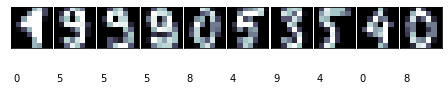

In [195]:
print_digits(images_train, clf.labels_, max_n=10)

#### Encontrando os Clusters Atribuídos aos Dados de Teste

In [196]:
y_pred = clf.predict(X_test)

y_pred

array([5, 8, 9, 0, 7, 2, 7, 3, 3, 6, 3, 5, 6, 3, 3, 7, 2, 5, 7, 6, 1, 8,
       5, 5, 9, 8, 5, 0, 1, 2, 5, 5, 6, 3, 5, 7, 7, 6, 9, 9, 2, 5, 5, 3,
       6, 6, 7, 4, 7, 7, 6, 8, 8, 4, 0, 1, 9, 9, 1, 5, 2, 5, 4, 1, 1, 3,
       3, 4, 8, 5, 7, 6, 6, 9, 2, 9, 5, 5, 5, 1, 8, 9, 4, 4, 5, 2, 5, 5,
       8, 2, 5, 0, 3, 7, 5, 1, 1, 2, 0, 2, 1, 6, 2, 7, 8, 0, 8, 5, 1, 5,
       1, 7, 1, 5, 1, 2, 9, 8, 1, 5, 9, 2, 6, 8, 3, 5, 8, 2, 3, 6, 1, 9,
       6, 4, 8, 2, 2, 2, 5, 0, 0, 7, 1, 6, 3, 9, 5, 2, 9, 0, 3, 2, 0, 4,
       4, 8, 7, 4, 5, 7, 0, 6, 9, 5, 2, 9, 5, 1, 4, 3, 7, 3, 1, 2, 9, 4,
       9, 8, 4, 8, 4, 8, 9, 1, 5, 1, 2, 7, 8, 9, 7, 8, 5, 2, 6, 2, 0, 0,
       4, 8, 1, 5, 9, 4, 1, 3, 8, 7, 8, 1, 5, 3, 3, 2, 4, 1, 9, 4, 2, 6,
       8, 7, 8, 8, 1, 7, 3, 2, 0, 0, 6, 1, 9, 1, 9, 8, 5, 5, 8, 8, 3, 7,
       8, 1, 2, 2, 9, 2, 6, 4, 5, 2, 1, 2, 7, 6, 1, 3, 5, 6, 2, 1, 6, 3,
       7, 7, 6, 5, 9, 7, 6, 3, 6, 5, 3, 1, 3, 2, 8, 0, 4, 2, 3, 3, 5, 7,
       3, 1, 8, 9, 6, 1, 4, 9, 7, 5, 9, 8, 2, 5, 4,

In [117]:
# Função para imprimir os dígitos de um determinado cluster
def print_cluster(images, y_pred, cluster_number):
    images = images[y_pred==cluster_number]
    y_pred = y_pred[y_pred==cluster_number]
    print_digits(images, y_pred, max_n=10)

<Figure size 432x288 with 0 Axes>

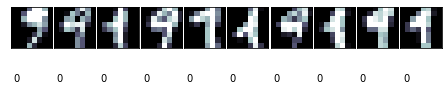

<Figure size 432x288 with 0 Axes>

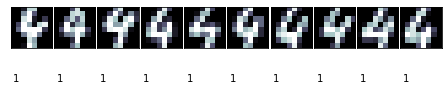

<Figure size 432x288 with 0 Axes>

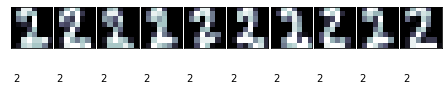

<Figure size 432x288 with 0 Axes>

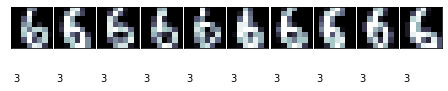

<Figure size 432x288 with 0 Axes>

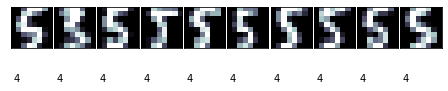

<Figure size 432x288 with 0 Axes>

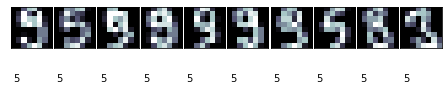

<Figure size 432x288 with 0 Axes>

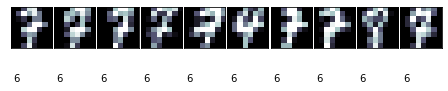

<Figure size 432x288 with 0 Axes>

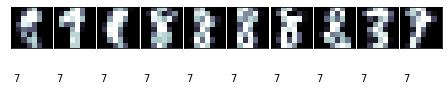

<Figure size 432x288 with 0 Axes>

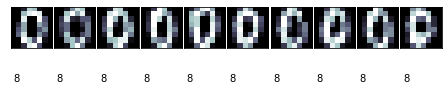

<Figure size 432x288 with 0 Axes>

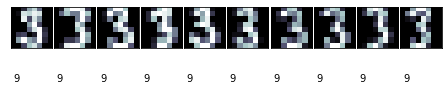

In [197]:
# Abaixo estão as imagens de cada cluster
for i in range(10) :
    print_cluster(images_test, y_pred, i)